# 사진 전처리 파일

In [1]:
import numpy as np
import pandas as pd
import cv2 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from tqdm import tqdm

샘플 이미지 테스트

흰색 : 255 , 검정색 : 0

In [42]:
img = cv2.imread('test/0001_3.jpg', cv2.IMREAD_GRAYSCALE)

In [39]:
cv2.imshow('test_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
img = np.array(img)
img.shape

(3371, 2471)

In [43]:
#test
cv2.imwrite('11111.jpg', img[:,:1000])
img = cv2.imread('11111.jpg', cv2.IMREAD_GRAYSCALE)
img.shape

(3371, 1000)

이미지 저장 테스트

In [14]:
#opencv는 배열 형태로도 이미지 저장이 가능
cv2.imwrite('11111.jpg', img)

True

흑백변환

In [ ]:
from_path = 'new/'
to_path = 'cut/'

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        cv2.imwrite(to_path + image_path , img[x1-5:x2+5])

적당한 크기로 자르기

In [57]:
from_path = 'new/'
to_path = 'cut/'

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        img = np.array(img)
        

        for ii in range(img.shape[0]):
            if sum(img[ii])/len(img[ii])<244.5:
                x1 = ii
                break
        for ii in range(img.shape[0]-1,0,-1):
            if sum(img[ii])/len(img[ii])<244.5:
                x2 = ii
                break
        cv2.imwrite(to_path + image_path , img[x1-5:x2+5])

100%|██████████| 475/475 [21:59<00:00,  2.78s/it]


EDA : 전체

In [19]:
from_path = 'cut/'

x_width = []#세로길이
y_width = []#가로길이

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        x_width.append(img.shape[0])
        y_width.append(img.shape[1])

100%|██████████| 475/475 [00:17<00:00, 27.08it/s]


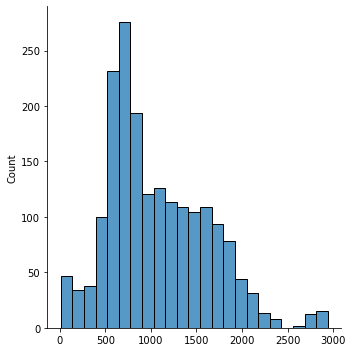

In [21]:
sns.displot(x_width)

In [71]:
print(min(x_width))
idx = x_width.index(min(x_width))
print(idx//4 + 1,idx%4 + 1)
img = cv2.imread('cut/'+str(idx//4 + 1).zfill(4)+'_'+str(idx%4 + 1)+'.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('test_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('11111.jpg', img)

10
128 1


True

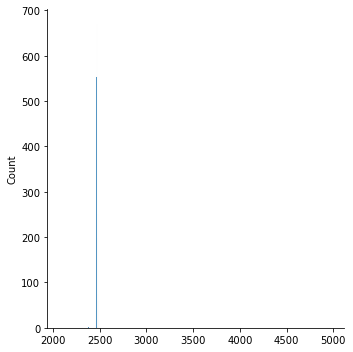

In [22]:
sns.displot(y_width)

In [23]:
max(y_width)

4967

In [46]:
idx = y_width.index(max(y_width))
print(idx//4 + 1,idx%4 + 1)
img = cv2.imread('cut/'+str(idx//4 + 1).zfill(4)+'_'+str(idx%4 + 1)+'.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('test_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('11111.jpg', img)

200 4


True

이진화 후 윤곽 따기 => 실패

In [97]:
def crop(img): # 인수는 이미지의 상대 경로
   
    # 주위 부분을 강제적으로 트리밍
    h, w = img.shape[:2]
    h1, h2 = 0, h
    w1, w2 = 0, w
    img = img[h1: h2, w1: w2]
   

    # 색 공간을 이진화한다.
    img2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)[1]
    # cv2.imshow('img2', img2)

    # 윤곽을 추출한다.
    contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

    # 윤곽의 좌표를 리스트에 대입한다.
    x1 = [] #x좌표의 최소값
    y1 = [] #y좌표의 최소값
    x2 = [] #x좌표의 최대값
    y2 = [] #y좌표의 최대값
    for i in range(1, len(contours)):# i = 1 는 이미지 전체의 외곽이되므로 카운트에 포함시키지 않는다.
        ret = cv2.boundingRect(contours[i])
        x1.append(ret[0])
        y1.append(ret[1])
        x2.append(ret[0] + ret[2])
        y2.append(ret[1] + ret[3])

    # 외곽의 첫 번째 외곽을 오려냄
    x1_min = min(x1)
    y1_min = min(y1)
    x2_max = max(x2)
    y2_max = max(y2)
    cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (0, 255, 0), 3)

    crop_img = img[y1_min:y2_max, x1_min:x2_max]
    # cv2.imshow('crop_img', crop_img)
    
    cv2.imshow('test_image',crop_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return crop_img

In [98]:
from_path = 'test/'
to_path = ''

for i in tqdm(range(128,129)):
    for j in range(1,2):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path,cv2.IMREAD_GRAYSCALE)
        
        cv2.imwrite(to_path + image_path , crop(img))

100%|██████████| 1/1 [00:05<00:00,  5.44s/it]


cut알고리즘

In [ ]:
from_path = 'new/'
to_path = 'cut/'

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        img = np.array(img)
        width = img.shape[1]
        
        x1 , x2 = -1 , -1
        
        for ii in range(img.shape[0]):
            for jj in range(int(width*1/4),int(width*3/4)):
                if img[ii][jj]<200:
                    x1 = ii
                    break
            if x1!=-1:
                break
                    
        for ii in range(img.shape[0]-1,0,-1):
            for jj in range(int(width*1/4),int(width*3/4)):
                if img[ii][jj]<200:
                    x2 = ii
                    break
            if x2!=-1:
                break
                    
        cv2.imwrite(to_path + image_path , img[x1-5:x2+5])

자르기 알고리즘 수정

In [19]:
from_path = 'new/'
to_path = 'new_cut/'

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        img = np.array(img)
        width = img.shape[1]
        
        x1 , x2 = -1 , -1
        
        for ii in range(img.shape[0]):
            cnt = 0
            for jj in range(int(width*1/4),int(width*3/4),2):
                if img[ii][jj]<200:
                    cnt += 1
            if cnt > width*1/50:
                x1 = ii
                break
                    
        for ii in range(img.shape[0]-1,0,-1):
            cnt = 0
            for jj in range(int(width*1/4),int(width*3/4),2):
                if img[ii][jj]<200:
                    cnt += 1
            if cnt > width*1/50:
                x2 = ii
                break
                    
        cv2.imwrite(to_path + image_path , img[x1:x2])

100%|██████████| 475/475 [1:10:33<00:00,  8.91s/it]


EDA

In [30]:
from_path = 'new_cut/'

x_width = []#세로길이
y_width = []#가로길이

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        x_width.append(img.shape[0])
        y_width.append(img.shape[1])

100%|██████████| 475/475 [00:16<00:00, 28.77it/s]


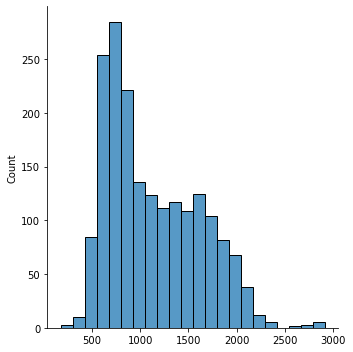

In [31]:
sns.displot(x_width)

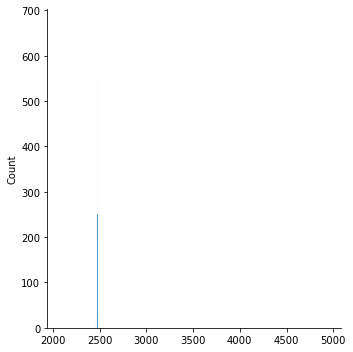

In [32]:
sns.displot(y_width)

In [37]:
min(x_width),min(y_width)

(174, 2083)

In [34]:
y_width.index(max(y_width))

796

In [35]:
799//4+1,799%4+1

(200, 4)

블러 처리  sigma : 표준편차 얼마나 흐릿하게

In [ ]:
#가우시안 필터 사용 테스트
img = cv2.imread('cut/0001_1.jpg', cv2.IMREAD_GRAYSCALE)
sigma = 5
#커널사이즈(0,0)은 sigma에 의해 자동 결정
dst = cv2.GaussianBlur(img, (0, 0), sigma)
cv2.imshow('test_image',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('0001_1_blur.jpg' , dst)

In [2]:
from_path = 'new/'
to_path = 'blur/'

for i in tqdm(range(1,476)):
    for j in range(1,5):
        image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
        img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
        dst = cv2.GaussianBlur(img, (0, 0), 2)
        cv2.imwrite(to_path + image_path , img)

100%|██████████| 475/475 [01:56<00:00,  4.06it/s]


test

In [ ]:
from_path = 'cut/'

i = 127
j = 1
image_path = str(i).zfill(4) + '_' + str(j) +'.jpg'
img = cv2.imread(from_path + image_path, cv2.IMREAD_GRAYSCALE)
img = np.array(img)
print(img.shape)

x1 , x2 = -1 , -1
width = img.shape[1]

for ii in range(img.shape[0]):
    for jj in range(int(width*1/4),int(width*3/4)):
        if img[ii][jj]<200:
            print(img[ii][jj])
            x1 = ii
            break
    if x1!=-1:
        break
                    
for ii in range(img.shape[0]-1,0,-1):
    for jj in range(int(width*1/4),int(width*3/4)):
        if img[ii][jj]<200:
            print(img[ii][jj])
            x2 = ii
            break
    if x2!=-1:
        break
print(x1,x2)

In [4]:
y = pd.read_csv('train_answers.csv')
y.set_index('writer',inplace=True)

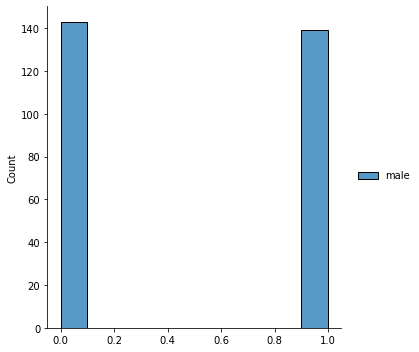

In [6]:
sns.displot(y)